In [75]:
import numpy as np
import pandas as pd
import gen_data
import regex as re
import seaborn as sns

In [76]:
industries = pd.read_csv('IndustryByState_2005-2021.csv').drop(columns=['GeoFips','LineCode'])
industries.loc[:,'Description'] = industries.loc[:,'Description'].apply(lambda x: x.strip())
industries = industries.set_index(['GeoName', 'Description']).mean(axis=1).reset_index('Description')
industries = industries.pivot(columns='Description',values=0)
industries.columns = industries.columns.to_list()
industries.index.rename('State', inplace=True)
industries = industries[['Information']].rename(columns = {'Information':'GDPcont_t0'})

spat = {"New England" : ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont'],
 "Mideast" : ['Delaware','District of Columbia','Maryland', 'New Jersey', 'New York', 'Pennsylvania'],
 "Great Lakes" : ['Illinois','Indiana','Michigan','Ohio','Wisconsin'],
 "Plains" : ['Iowa','Kansas','Minnesota','Missouri','Nebraska','North Dakota', 'South Dakota'],
 "Southeast" : ['Alabama', 'Alabama', 'Arkansas', 'Florida','Georgia', 'Kentucky','Louisiana','Mississippi','North Carolina','South Carolina','Tennessee','Virginia','West Virginia'],
 "Southwest" : ['Arizona','New Mexico','Oklahoma','Texas'],
 "Rocky Mountain" : ['Colorado', 'Idaho', 'Montana', 'Utah', 'Wyoming'],
 "Far West" : ['Alaska', 'California','Hawaii','Nevada','Oregon','Washington']}
spat_inv = {}
for region, states in spat.items():
    sub_dict = {state : region for state in states}
    spat_inv.update(sub_dict)
spat_inv

regions = industries.reset_index('State')['State'].apply(lambda x: spat_inv[x])
regions.index = industries.index
industries.loc[:,'Region'] = regions
industries.to_csv('IndustriesTechClean.csv')
industries.sort_values('GDPcont_t0', ascending=False)

,GDPcont_t0,Region
State,,
Washington,0.947419,Far West
California,0.709355,Far West
New York,0.465806,Mideast
Pennsylvania,0.418226,Mideast
Georgia,0.370968,Southeast
Connecticut,0.313871,New England
Utah,0.310000,Rocky Mountain
Colorado,0.268387,Rocky Mountain
Massachusetts,0.259516,New England


In [77]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
simLong, treatment = gen_data.sim_data(industries, **gen_data.sim_params)
simLong

,,stateControls_t,GDPcont_t
State,t,,
Colorado,0,0.012040,0.268387
Texas,0,0.011700,0.210161
Wisconsin,0,0.016718,0.197581
New Jersey,0,0.017135,0.186290
Tennessee,0,0.025745,0.145323
...,...,...,...
Illinois,10,0.015971,0.644092
Minnesota,10,0.028348,0.335940
Missouri,10,0.019948,0.327715


In [79]:
treatment

,treatment_year,treatment_effect
State,,
Colorado,NaN,0.302046
Texas,5.0,0.301938
Wisconsin,NaN,0.301595
New Jersey,5.0,0.301581
Tennessee,NaN,0.300128
Illinois,5.0,0.299442
Minnesota,NaN,0.303592
Missouri,NaN,0.301635
West Virginia,5.0,0.298105


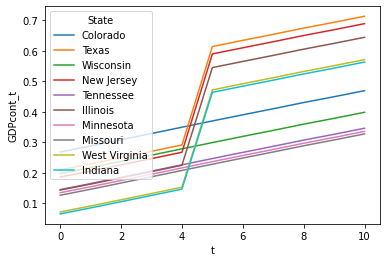

In [104]:
ax = sns.lineplot(data= simLong, x = 't', y = 'GDPcont_t', hue = 'State')
# ax.get_legend().remove()

In [101]:
import fit_model
lm, data, baseline = fit_model.fit_TWFE(data=simLong,
                                    treatment_years=treatment,
                                    target = 'GDPcont_t',
                                    linear_time=True,
                                    treat_dummy_type='time_variant')

In [103]:
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              GDPcont_t   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.266e+05
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          2.22e-218
Time:                        15:02:13   Log-Likelihood:                 613.89
No. Observations:                 110   AIC:                            -1204.
Df Residuals:                      98   BIC:                            -1171.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2687      0.000    779.303      0.000       0.268       0.269
state_Illinois         -0.1250      0.000   -277.781      0.000      -0.126      -0.124
state_Indiana          -0.2047      0.000   -454.984      0.000      -0.206      -0.204
state_Minnesota        -0.1334      0.000   -323.722      0.000      -0.134      -0.133
state_Missouri         -0.1416      0.000   -343.685      0.000      -0.142      -0.141
state_New Jersey       -0.0812      0.000   -180.535      0.000      -0.082      -0.080
state_Tennessee        -0.1231      0.000   -298.669      0.000      -0.124      -0.122
state_Texas            -0.0572      0.000   -127.039      0.000      -0.058      -0.056
state_West Virginia    -0.1975      0.000   -438.948      0.000      -0.198      -0.197
state_Wisconsin        -0.0708      0.000   -171.843      0.000      -0.072      -0.070
t                       0.0201   3.69e-05    546.598      0.000       0.020       0.020
d                       0.3000      0.000    906.229      0.000       0.299       0.301
==============================================================================
Omnibus:                        0.195   Durbin-Watson:                   0.871
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.375
Skew:                          -0.020   Prob(JB):                        0.829
Kurtosis:                       2.717   Cond. No.                         66.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
baseline

['state_Colorado']

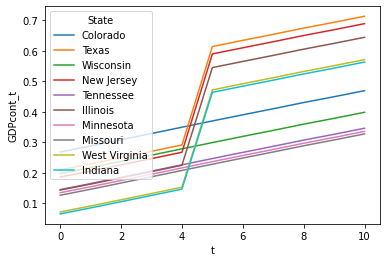

In [106]:
ax = sns.lineplot(data= simLong, x = 't', y = 'GDPcont_t', hue = 'State')


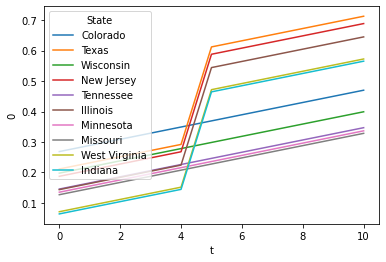

In [107]:
lm.fittedvalues.to_frame()
ax = sns.lineplot(data= lm.fittedvalues.to_frame().reset_index(), x = 't', y = 0, hue = 'State')
